## Antibiotic resistance analysis

In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
DATA = os.path.join("..","data")
CHENNAI_AMR= os.path.join(DATA, "Chennai_data", "AMR")
AMR_FIGURE = os.path.join("..","figures")

In [3]:
data = pd.read_csv(os.path.join(CHENNAI_AMR, "AMR_annotation.csv"))
## RPKM threshold 
print("Before filtering",data.shape)
RPKM_THRESHOLD = 0.5
TITLE = "0_5"
data = data.query("RPKM > @RPKM_THRESHOLD")
print("After filtering",data.shape)
# Group by both "Sample" and "Group" and calculate the mean RPKM
result_df = data[['Sample', 'Group', 'RPKM']].groupby(['Sample', 'Group']).mean().reset_index()

print(result_df)


Before filtering (11798, 5)
After filtering (8849, 5)
        Sample                         Group       RPKM
0    368246110         Multi-drug resistance   3.091429
1    368246110      aminocoumarin antibiotic   3.826182
2    368246110     aminoglycoside antibiotic   6.213613
3    368246110  bicyclomycin-like antibiotic   0.924810
4    368246110                    carbapenem   0.613495
..         ...                           ...        ...
985  368299282           phenicol antibiotic   2.575344
986  368299282    phosphonic acid antibiotic   0.742813
987  368299282          rifamycin antibiotic  20.101774
988  368299282        sulfonamide antibiotic  19.681121
989  368299282       tetracycline antibiotic   1.376668

[990 rows x 3 columns]


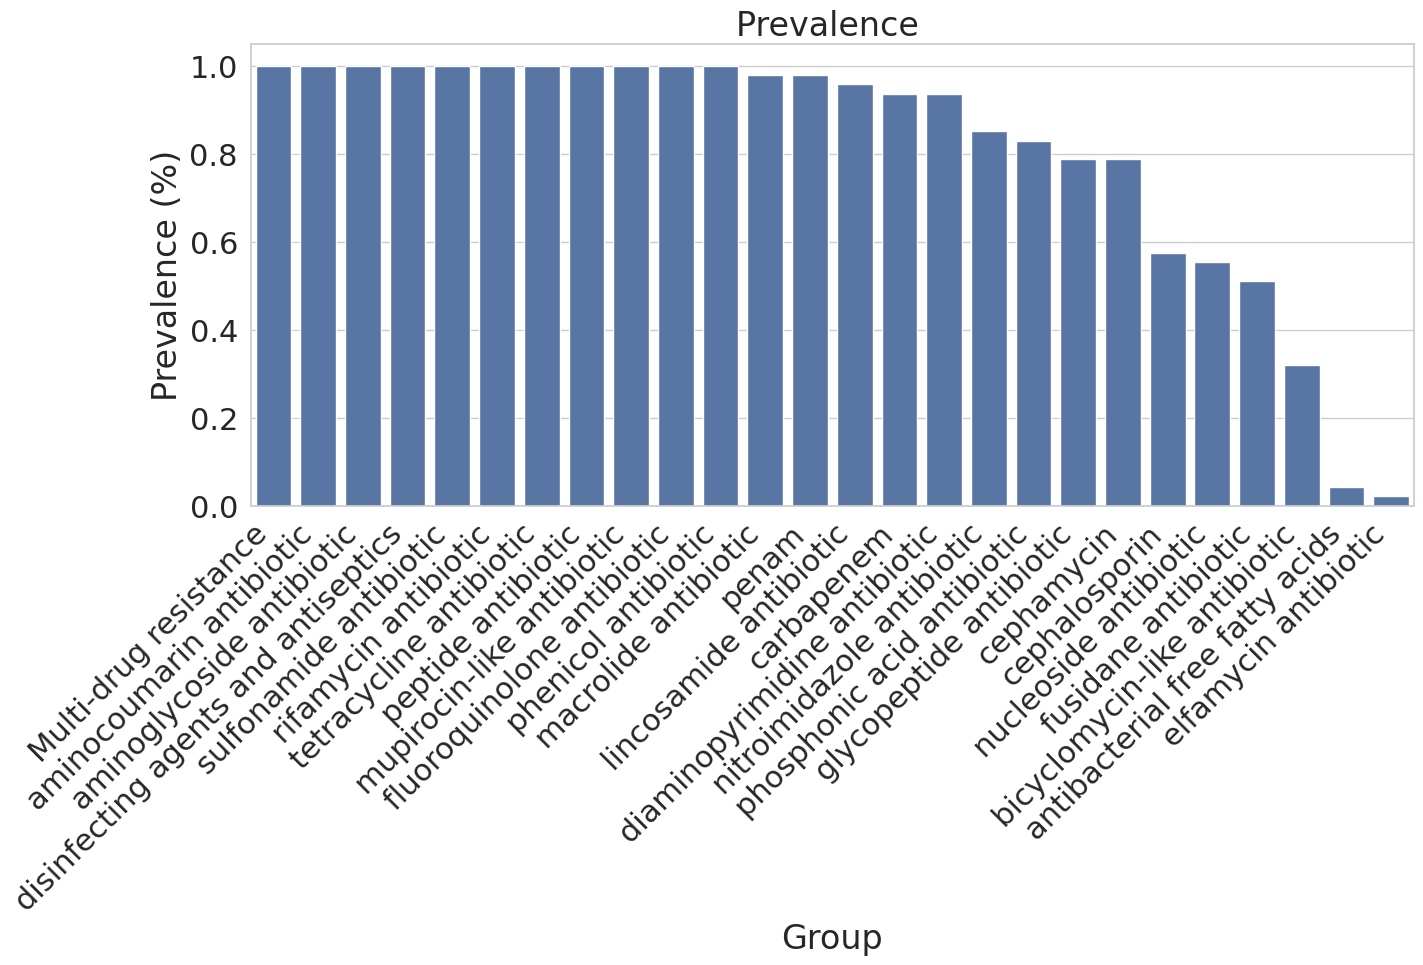

In [4]:
prevalence_data =result_df.groupby('Group').size() / 47

prevalence_data_sorted = prevalence_data.sort_values(ascending=False)
#sns.set(style="whitegrid", font_scale=2) 
sns.set_theme(style="whitegrid", font_scale=2) 
# Plot the prevalence values
plt.figure(figsize=(15, 6))
sns.barplot(x=prevalence_data_sorted.index, y=prevalence_data_sorted.values)
plt.title('Prevalence ')
plt.xlabel('Group')
plt.xticks(rotation=45, ha='right') 
plt.ylabel('Prevalence (%)')
plt.savefig(os.path.join(AMR_FIGURE,f'Figure_6_B.png'), dpi=600, bbox_inches='tight')
plt.show()

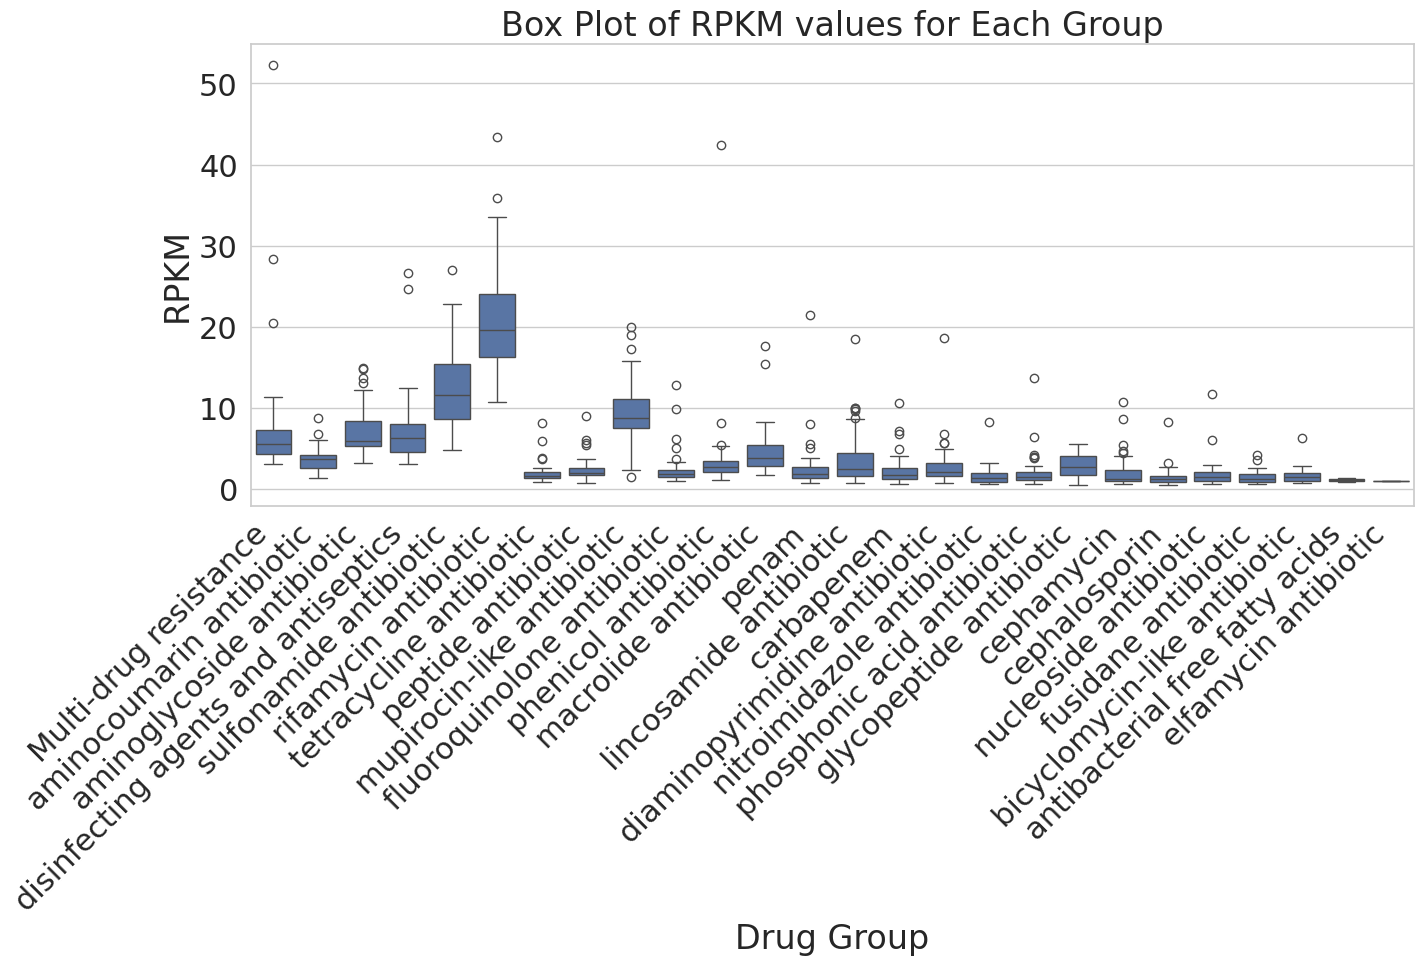

In [5]:
order_list = prevalence_data.sort_values(ascending=False).index.tolist()
#sns.set(style="whitegrid", font_scale=2)
sns.set_theme(style="whitegrid", font_scale=2)
plt.figure(figsize=(15, 6))
sns.boxplot(x='Group', y='RPKM', data= result_df, order= order_list)
plt.title('Box Plot of RPKM values for Each Group')
plt.xlabel('Drug Group')
plt.xticks(rotation=45, ha='right')
plt.ylabel('RPKM')
plt.savefig(os.path.join(AMR_FIGURE,f'Figure_6_A.png'), dpi=600, bbox_inches='tight')
plt.show()


In [6]:
result_df.head()

,Sample,Group,RPKM
0,368246110,Multi-drug resistance,3.091429
1,368246110,aminocoumarin antibiotic,3.826182
2,368246110,aminoglycoside antibiotic,6.213613
3,368246110,bicyclomycin-like antibiotic,0.924810
4,368246110,carbapenem,0.613495


## resistance mechanism

Before filtering (11798, 3)
After filtering (4212, 3)


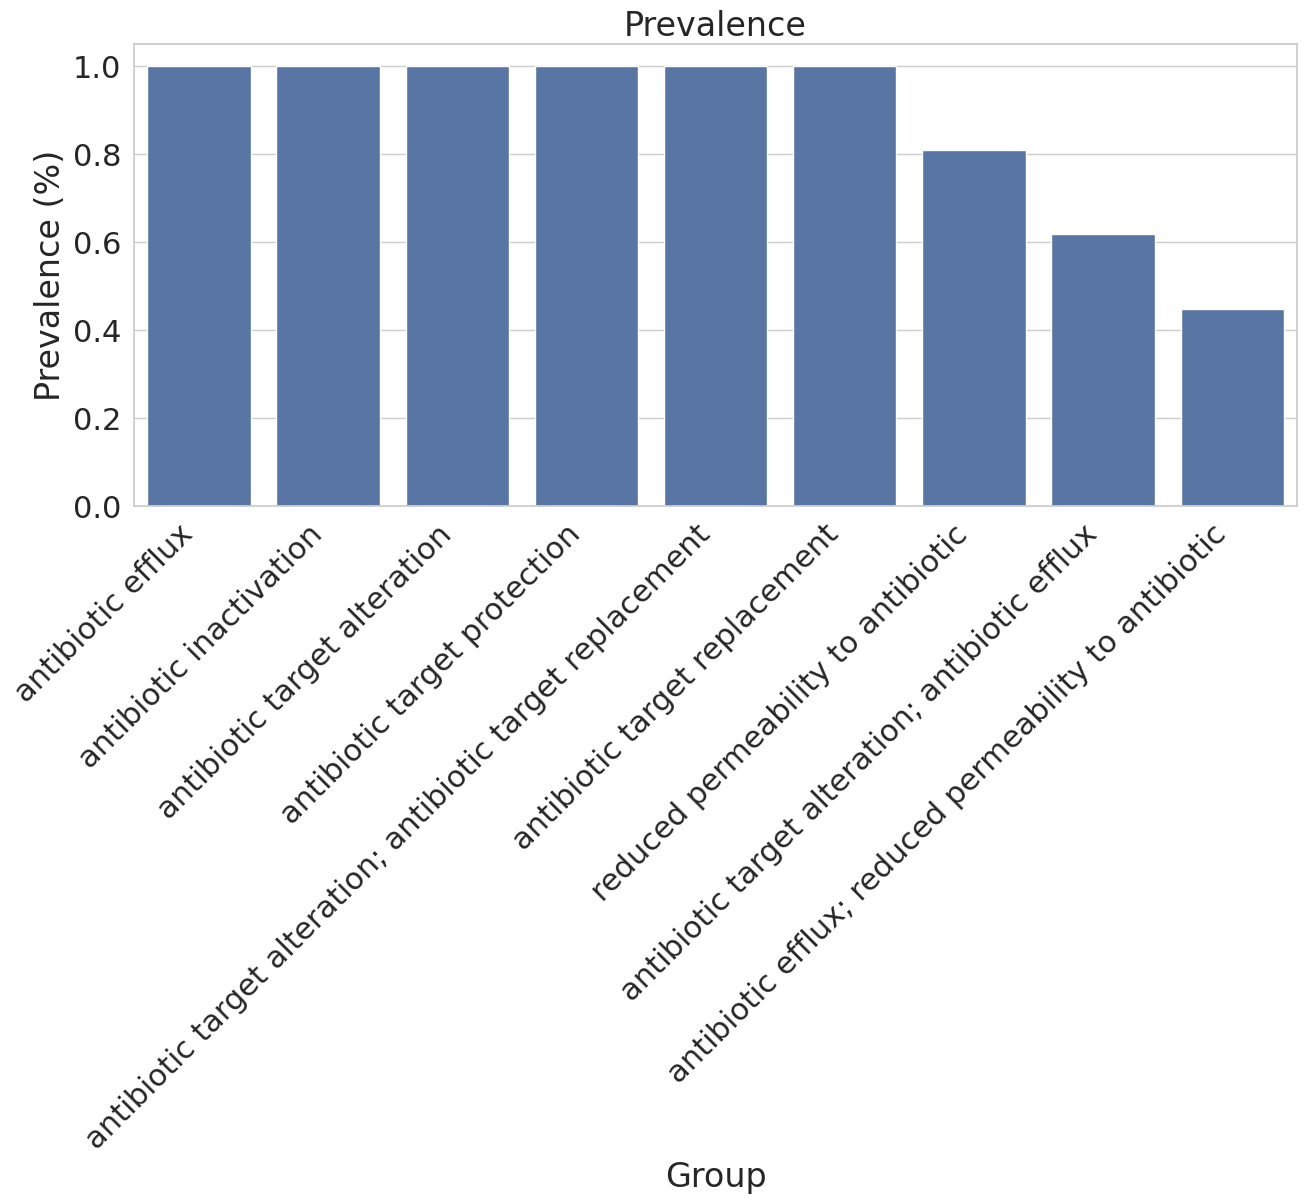

In [7]:
data = pd.read_csv(os.path.join(CHENNAI_AMR, "combined_data_resistance_mechanism.csv"))

## RPKM threshold 
print("Before filtering",data.shape)
RPKM_THRESHOLD = 2
TITLE = "2"
data = data.query("RPKM > @RPKM_THRESHOLD")
print("After filtering",data.shape)


# Group by both "Sample" and "Group" and calculate the mean RPKM
result_df = data.groupby(['Sample', 'resistance_mechanism']).mean().reset_index()



prevalence_data =result_df.groupby('resistance_mechanism').size() / 47

prevalence_data_sorted = prevalence_data.sort_values(ascending=False)
#sns.set(style="whitegrid", font_scale=2) 
sns.set_theme(style="whitegrid", font_scale=2) 
# Plot the prevalence values
plt.figure(figsize=(15, 6))
sns.barplot(x=prevalence_data_sorted.index, y=prevalence_data_sorted.values)
plt.title('Prevalence')
plt.xlabel('Group')
plt.xticks(rotation=45, ha='right') 
plt.ylabel('Prevalence (%)')
plt.savefig(os.path.join(AMR_FIGURE,f'Figure_6_D.png'), dpi=600, bbox_inches='tight')
plt.show()

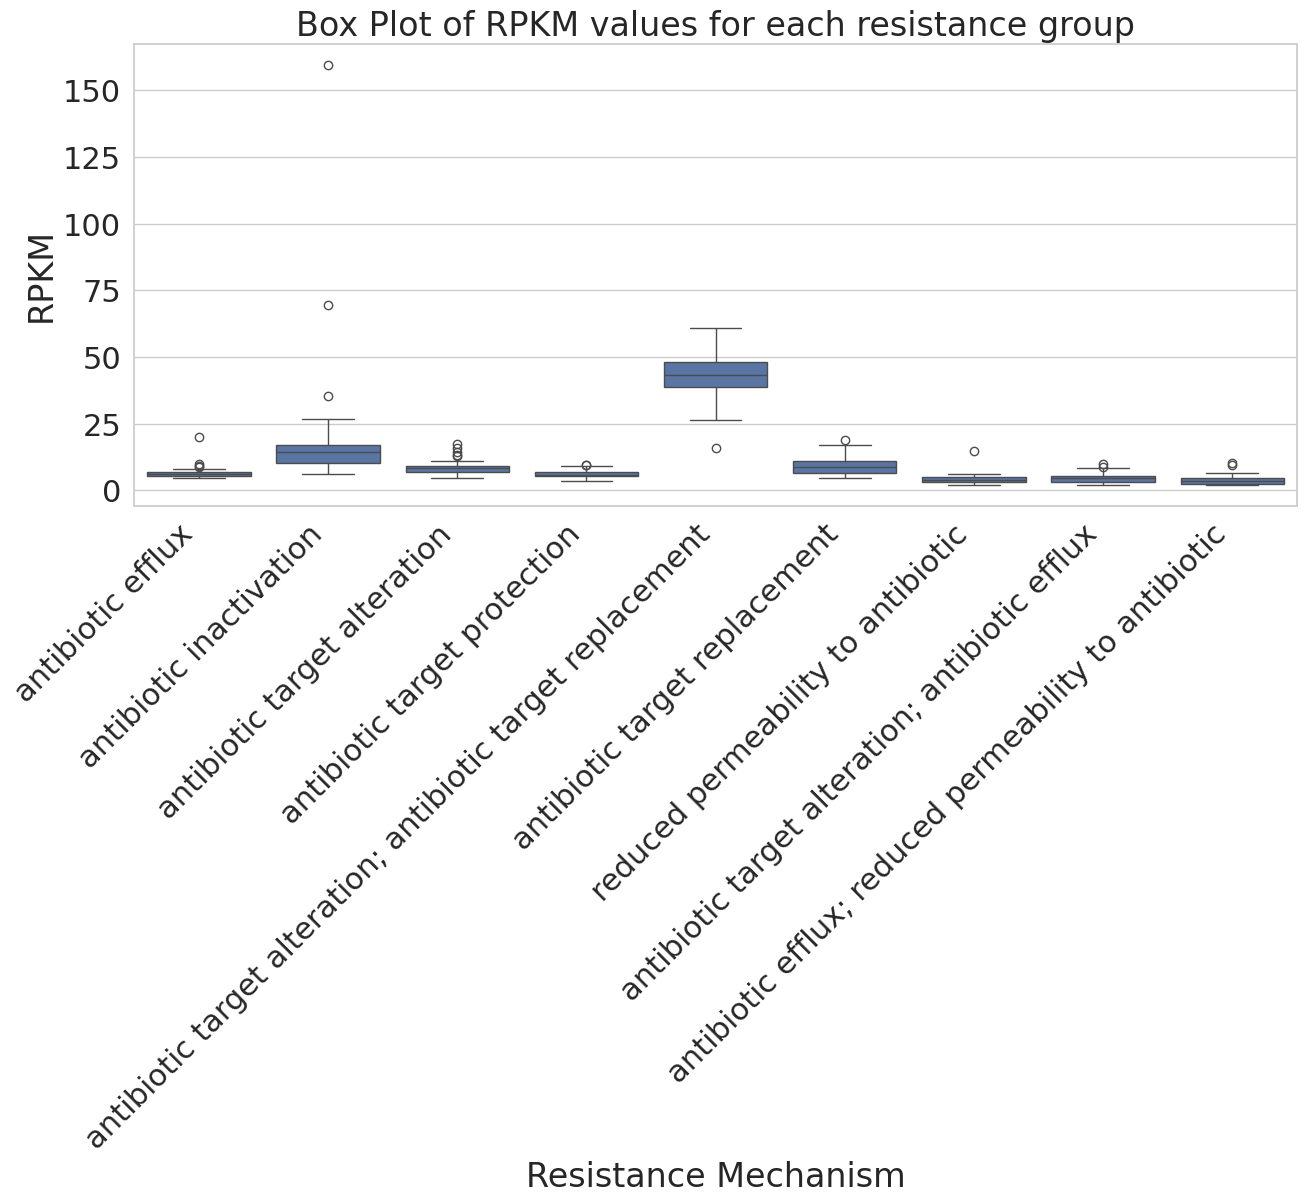

In [8]:
order_list = prevalence_data.sort_values(ascending=False).index.tolist()
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Create a box plot using Seaborn
#sns.set(style="whitegrid", font_scale=2)
sns.set_theme(style="whitegrid", font_scale=2)
plt.figure(figsize=(15, 6))
sns.boxplot(x='resistance_mechanism', y='RPKM', data= result_df, order= order_list)
plt.title('Box Plot of RPKM values for each resistance group')
plt.xlabel('Resistance Mechanism')
plt.xticks(rotation=45, ha='right')
plt.ylabel('RPKM')
plt.savefig(os.path.join(AMR_FIGURE,f'Figure_6_C.png'), dpi=600, bbox_inches='tight')
plt.show()
